In [19]:


from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


In [29]:
# iris = datasets.load_iris()
# print(iris['data'])
# print(iris['target'])


In [22]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

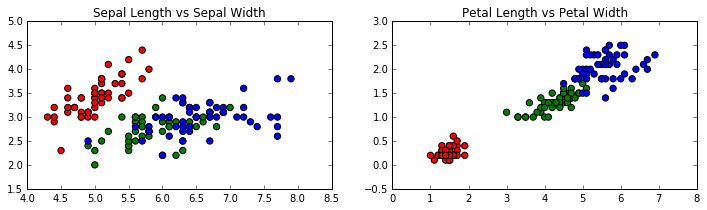

In [23]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y.Target], s=40)
plt.title('Petal Length vs Petal Width')

### We can clearly see the grouping in the plots with the red dots, which correspond to species Setosa. The green and blue dots are not so clearly separable.

Now let’s use the KMeans algorithm to see if it can create the clusters automatically.

In [24]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

model.fit() function runs the algo on the data and creates the clusters. Each sample in the dataset is then assigned a cluster id (0, 1, 2, etc).

model.labels_ holds the array of the cluster ids, so let’s take a look at it 

In [26]:
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


This looks very similar to the iris.target array.
An important note: iris.target is an array of integers used to represent the Iris species. 0=Setosa, 1=Versicolor, 2=Virginica. And the KMeans model object also assigns integer ids for the three clusters (n_clusters =3 above), namely 0, 1, 2. Its important to note that the KMeans model has no knowledge of the iris.target data, and the clusters being given ids 0,1,2 is just a coincidence.
To verify the output of the model, let’s visualise it. Notice that we will reorder the cluster ids slightly to make the plots show the correct color representation as before.

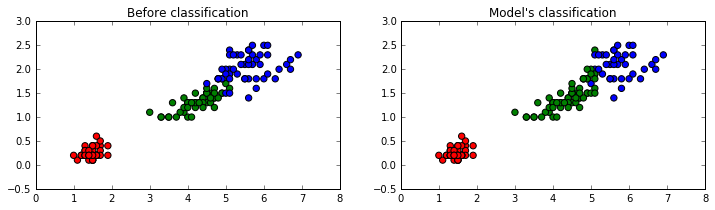

In [28]:
#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# The fudge to reorder the cluster ids.
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before classification')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's classification")